In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy
import seaborn as sns
sns.set() # for plot styling
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('movie_metadata.csv')

In [5]:
print(data.shape)
print(data.head())

(5043, 28)
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1    

In [9]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [31]:
newdata = data.iloc[:, 4:6]
newdata.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [32]:
from sklearn.cluster import KMeans

In [33]:
kmeans = KMeans(n_clusters = 5)

In [35]:
not_nan = ['director_facebook_likes', 'actor_3_facebook_likes']
for x in not_nan:
    newdata[x]=newdata[x].replace(np.NaN, 0)

In [36]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
kmeans.cluster_centers_

array([[  150.22659686,   420.43748691],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17545.45454545, 14545.45454545],
       [17621.21212121,   596.10606061]])

In [38]:
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 0 0 0]
5043


In [40]:
print(type(kmeans.labels_))
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 4775, 1: 104, 2: 87, 3: 11, 4: 66}


C:\Users\Sourav Sarkar\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


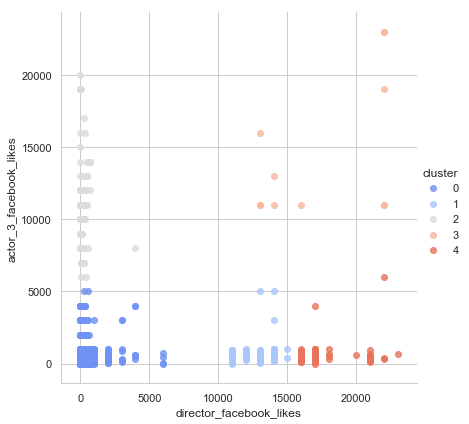

In [45]:
#plot the data
newdata['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data = newdata, hue = 'cluster', palette='coolwarm', 
           size = 6, aspect=1, fit_reg = False)